In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pytrends.request import TrendReq #Trend Request
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting pytrends library & Keyword

pytrends = TrendReq(hl = "en-US", tz=360)
keyword = "artificial intelligence"

In [6]:
# Data Request

pytrends.build_payload([keyword], cat= 0, timeframe="today 12-m", geo="", gprop="")

In [7]:
# Country wise interest

region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)

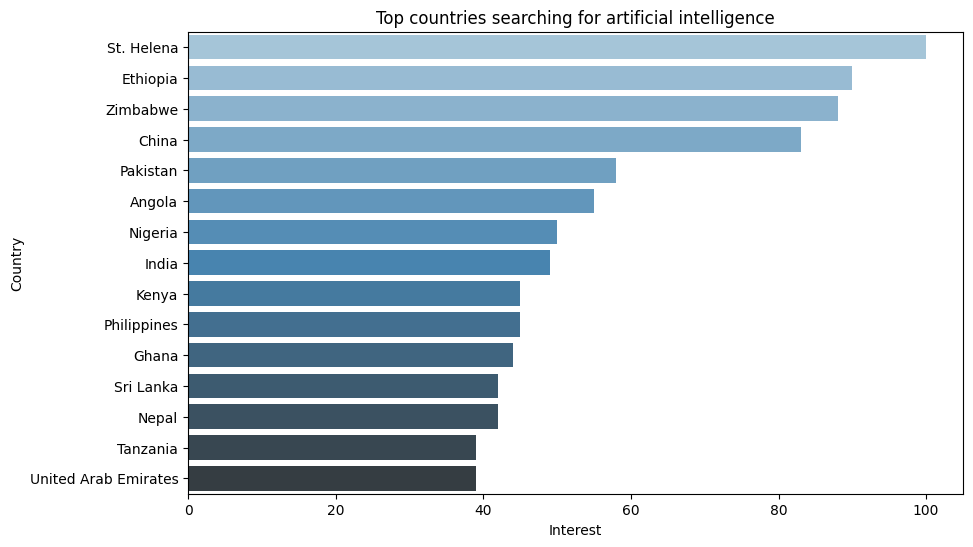

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette="Blues_d")
plt.title(f"Top countries searching for {keyword}")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.savefig(f"../Visuals/Top Countries Searching for {keyword}.png")
plt.show()

In [10]:
# Creating world map

region_data = region_data.reset_index()

fig = px.choropleth(region_data,
                    locations="geoName",
                    locationmode="country names",
                    color = keyword,
                    title=f"Search Interest for {keyword} by Country",
                    color_continuous_scale="Blues")

fig.show()

In [12]:
# Time waste interest

time_df = pytrends.interest_over_time()

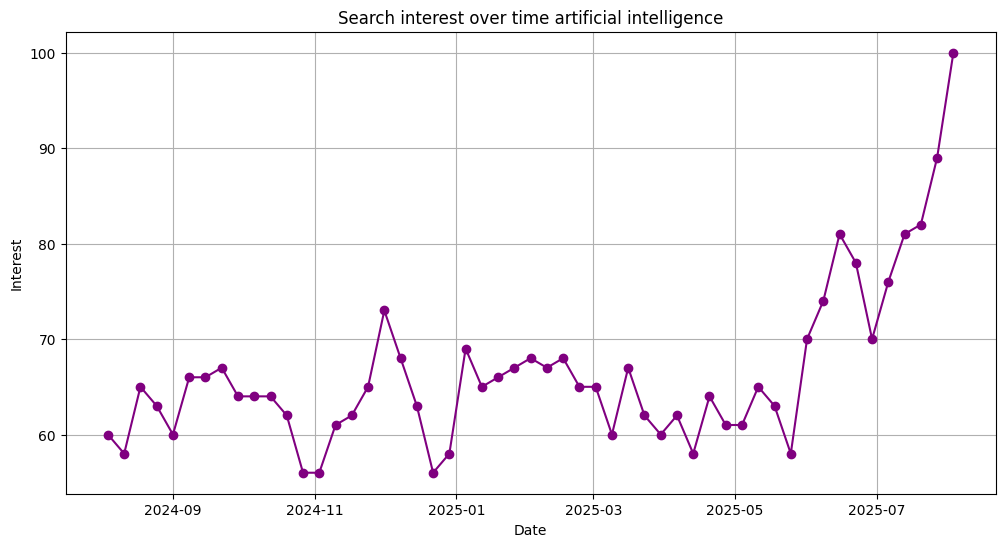

In [14]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker="o", color="purple")
plt.title(f"Search interest over time {keyword}")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.savefig(f"../Visuals/Search interest over time {keyword}.png")
plt.show()


In [15]:
#Multiple keywords compare

kw_list = ["cloud computing","data science","machine learning"]
pytrends.build_payload(kw_list,cat=0,timeframe="today 12-m",geo="",gprop="")

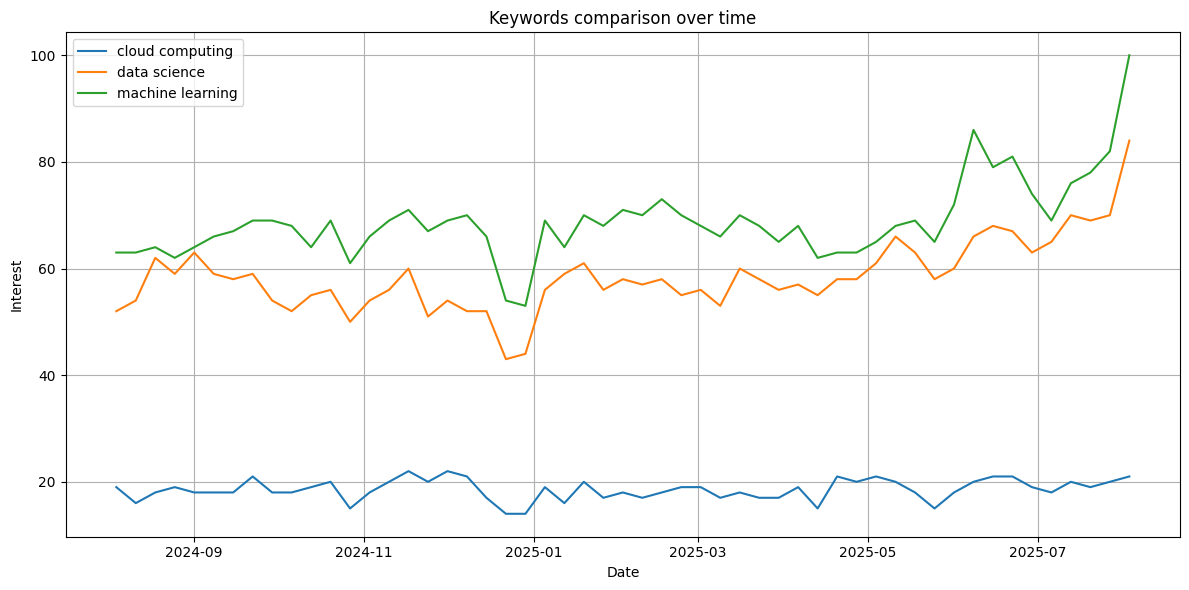

In [16]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index,compare_df[kw],label = kw)

plt.title("Keywords comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"../Visuals/Keywords comparison over time.png")
plt.show()